# Player Segementation Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("player_rank.csv")
df.head(10)

,name,account_id,rank,games,kills,wins,average_damage,win_ratio,season,game_type,season_length
0,Oilersfan74,account.166d81fc85534147b1b4bf2e537d5077,1,2463,2348,34,116,0.013804,xbox-01,solo,30
1,ALPHA NANOC,account.f396a20e56a94b4ba82b5f4eebd54861,1,2075,10399,429,526,0.206747,xbox-02,solo,173
2,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,2,1755,4955,231,327,0.131624,xbox-02,solo,173
3,WyattEarpXXX,account.d6c2446f5a924e53bb74b286ca1cc9ed,2,1136,4902,171,527,0.150528,xbox-01,solo,30
4,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,3,1209,3424,137,323,0.113317,xbox-01,solo,30
5,JonFriendly,account.14731f042cdb45fa8fd4edb5f47ac29e,3,1649,3575,123,238,0.074591,xbox-02,solo,173
6,XreecyX,account.a0af18f8ce5040a6a3b45029e8adea3c,4,1593,8090,316,534,0.198368,xbox-02,solo,173
7,Brat0069,account.3520dffd3e3944e1893175cfef9e85f5,4,1745,2363,130,153,0.074499,xbox-01,solo,30
8,zCritic,account.dfea3f7020494c53afd7bdd8e2528910,5,1344,7153,212,552,0.157738,xbox-01,solo,30
9,xBindersx,account.6668be42410243cf9446a2d45788b2a2,5,2290,9217,163,430,0.071179,xbox-02,solo,173


In [5]:
df.shape

(644, 11)

## Inspect Data from JBZ

In [6]:
df.describe()

,rank,games,kills,wins,average_damage,win_ratio,season_length
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,210.698758,1004.757764,1499.953416,35.781056,188.708075,0.043936,61.975155
std,148.647378,395.400453,1155.703808,45.020820,124.483850,0.057457,59.628497
min,1.000000,321.000000,139.000000,0.000000,20.000000,0.000000,30.000000
25%,81.000000,724.750000,816.250000,9.000000,111.000000,0.008857,30.000000
50%,178.500000,916.000000,1152.500000,17.000000,137.000000,0.020233,30.000000
75%,339.250000,1191.750000,1772.000000,49.000000,246.750000,0.060615,30.000000
max,500.000000,3212.000000,10399.000000,429.000000,939.000000,0.398990,173.000000


In [7]:
df.dtypes

name               object
account_id         object
rank                int64
games               int64
kills               int64
wins                int64
average_damage      int64
win_ratio         float64
season             object
game_type          object
season_length       int64
dtype: object

In [8]:
df.isnull().sum()

name              0
account_id        0
rank              0
games             0
kills             0
wins              0
average_damage    0
win_ratio         0
season            0
game_type         0
season_length     0
dtype: int64

## Begin Analysis

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

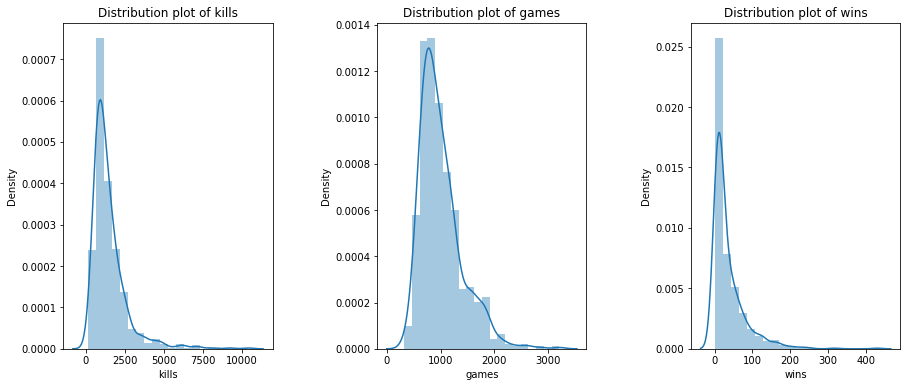

In [10]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['kills', 'games', 'wins']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distribution plot of {}'.format(x))
plt.show()

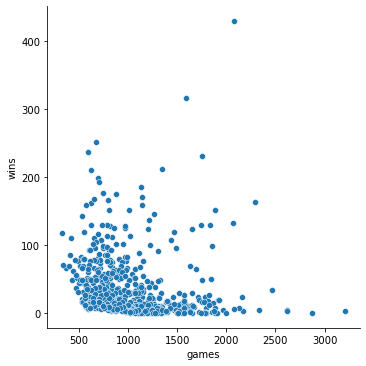

In [11]:
sns.relplot(x='games', y = 'wins', data=df)

## Elbow Test to look for ideal number of clusters

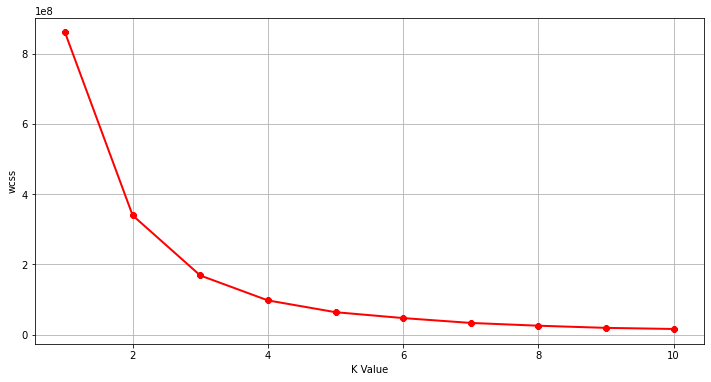

In [24]:
x1 = df.loc[:, ['kills', 'wins']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

## Inspect clusters

In [25]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x1)
print(label)

[2 0 0 0 2 2 0 2 0 0 2 2 0 2 0 2 2 1 2 2 2 2 2 2 0 2 0 1 1 2 1 0 2 1 2 2 2
 1 1 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 1 1 0 0 2 2 1 2 1 1 0 2 2 2 2 1 2
 1 0 2 1 1 2 2 2 1 2 2 1 2 1 1 2 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 2 2 1 2 2 2 1 2 1 2 1 0 1 1 1 2 0 2 1 2 2 1 2 1 1 2 2 2 1 2 2 2 2
 2 2 1 1 2 1 1 2 1 2 2 1 0 2 2 2 2 0 1 1 2 1 2 2 1 2 2 2 0 1 1 2 1 2 2 2 2
 1 1 1 1 2 2 1 1 1 1 2 2 1 1 2 0 2 2 1 1 1 1 2 2 2 2 1 2 2 2 1 1 0 1 1 2 2
 1 0 1 1 2 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 2 2 1 2 1 1 2 1 1 2 2 1 1 2 2
 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1
 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 2 2 1 1
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 

## Check Centroids

In [26]:
print(kmeans.cluster_centers_)


[[5712.5         167.07692308]
 [ 964.96659243   18.55679287]
 [2273.22485207   61.34319527]]


## Wins and Kills Cluster

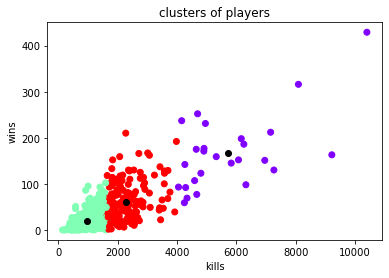

In [27]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("clusters of players")
plt.xlabel("kills")
plt.ylabel("wins")
plt.show()

## Rank and Win Ratio Cluster

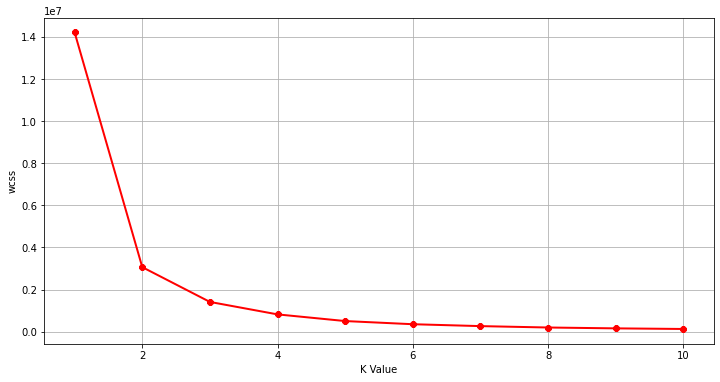

In [28]:
x2 = df.loc[:, ['rank', 'win_ratio']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(x2)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [41]:
print(kmeans.cluster_centers_)

[[2.73793103e+02 7.33720864e-02 2.24041379e+03]
 [5.34037037e+02 1.59503592e-01 5.64818519e+03]
 [1.34241535e+02 2.53300092e-02 9.56291196e+02]]


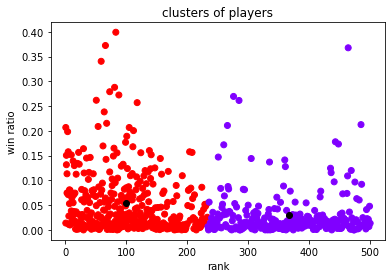

In [31]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("clusters of players")
plt.xlabel("rank")
plt.ylabel("win ratio")
plt.show()

## Average Damage and Win Ratio Segmentation


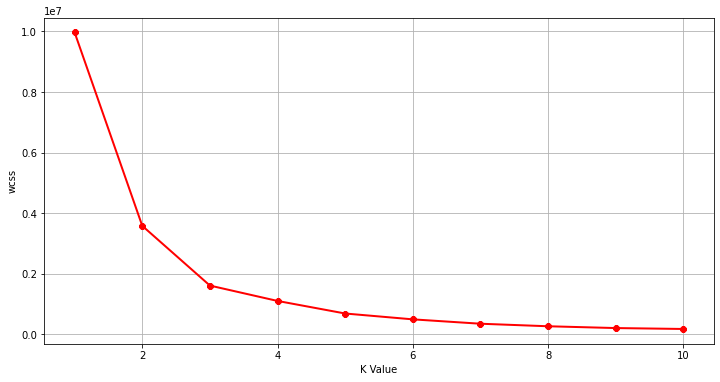

In [34]:
x3 = df.loc[:, ['average_damage', 'win_ratio']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x3)
print(label)

[1 2 0 2 0 0 2 1 2 2 1 0 0 0 2 1 1 1 0 0 0 0 0 1 2 0 2 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 2 1 1 1 1 1 1 0 0 0 1 1 0 1 1 2 2 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 2 0 0 1 0 2 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 2 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 2 1 1 0 1 0 2 1 0 1 2 1 0 1 0 2 0 1 1 2 1 1 1 1 1 0 0 1 2 0 1 0
 1 0 0 1 0 0 1 1 1 0 2 1 2 0 0 1 0 2 1 1 0 1 0 0 1 1 0 2 0 1 1 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 0 1 1 2 2 0 0 1 1 1 1 0 0 2 0 1 0 0 0 1 1 2 0 0 0 0
 1 2 1 1 0 1 1 1 1 1 1 0 2 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 2 0 1 1 1 1
 1 1 1 0 0 2 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 2 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 0 1 2 0 1 

In [42]:
print(kmeans.cluster_centers_)

[[2.73793103e+02 7.33720864e-02 2.24041379e+03]
 [5.34037037e+02 1.59503592e-01 5.64818519e+03]
 [1.34241535e+02 2.53300092e-02 9.56291196e+02]]


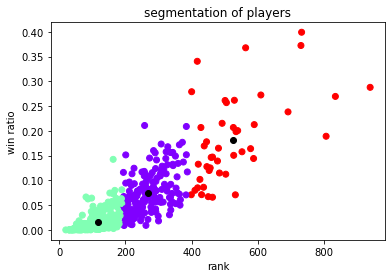

In [37]:
plt.scatter(x3[:,0], x3[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("segmentation of players")
plt.xlabel("rank")
plt.ylabel("win ratio")
plt.show()

## Further Segmentation Analysis

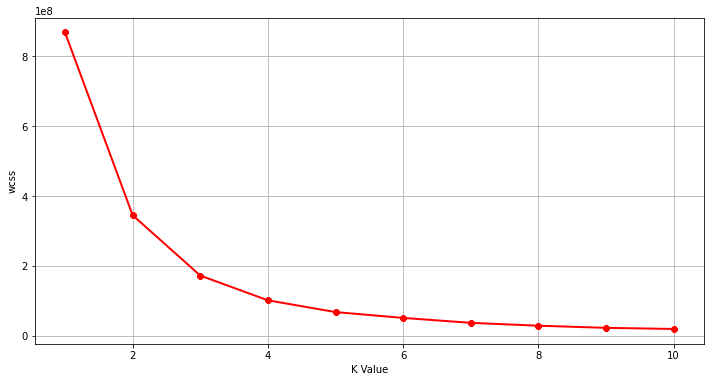

In [38]:
x4 = df.loc[:, ['average_damage', 'win_ratio', 'kills']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x4)
print(label)

[0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 2 0 0 0 0 0 0 1 0 1 2 2 0 2 1 0 2 0 0 0
 2 2 0 2 2 2 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 1 1 0 0 2 0 2 2 1 0 0 0 0 2 0
 2 1 0 2 2 0 0 0 2 0 0 2 0 2 2 0 0 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 0 0 2 0 0 0 2 0 2 0 2 1 2 2 2 0 1 0 2 0 0 2 0 2 2 0 0 0 2 0 0 0 0
 0 0 2 2 0 2 2 0 2 0 0 2 1 0 0 0 0 1 2 2 0 2 0 0 2 0 0 1 1 2 2 0 2 0 0 0 0
 2 2 2 2 0 0 2 0 2 2 0 0 2 2 0 1 0 0 2 2 2 2 0 0 0 0 2 0 0 0 2 2 1 2 2 0 0
 2 1 2 2 0 2 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 0 0 2 0 2 2 0 2 2 0 0 2 2 0 0
 2 2 0 2 2 2 2 2 2 0 2 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2
 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 2 2
 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0
 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2
 2 2 2 2 2 2 2 2 2 0 0 2 

In [43]:
print(kmeans.cluster_centers_)

[[2.73793103e+02 7.33720864e-02 2.24041379e+03]
 [5.34037037e+02 1.59503592e-01 5.64818519e+03]
 [1.34241535e+02 2.53300092e-02 9.56291196e+02]]


In [45]:
clusters = kmeans.fit_predict(x4)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.average_damage[df.label == 0],df["win_ratio"][df.label == 0], df["kills"][df.label == 0], c="blue", s=60)
ax.scatter(df.average_damage[df.label == 1],df["win_ratio"][df.label == 1], df["kills"][df.label == 1], c="red", s=60)
ax.scatter(df.average_damage[df.label == 2],df["win_ratio"][df.label == 2], df["kills"][df.label == 2], c="green", s=60)
ax.view_init(30, 185)


plt.xlabel("average damage")
plt.ylabel("win ratio")
ax.set_zlabel()
